In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
#動画から画像取得
def get_img_from_videos(video_path, img_num):
    imgs = []
    cap = cv2.VideoCapture(video_path)
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        if ret == False:
            continue
        # Our operations on the frame come here
        imgs.append(frame)
        if len(imgs) >= img_num:
            break
    # When everything done, release the capture
    cap.release()
    return imgs

In [3]:
def row_and_col(i):
    row = round(np.power(i, 1./2.))
    col = i // row
    if i - col * row != 0:
        col += 1
    return int(row), int(col)

In [4]:
def add_text_to_img(img, text):
    #make text area img
    text_area = np.zeros_like(img[:50, :, :])
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_area = cv2.putText(text_area, text, (10,40), font, 1, (255,255,255), 2, cv2.LINE_AA)
    #concat
    ret = cv2.vconcat([text_area, img])
    return ret

In [5]:
def concat_imgs_tile_with_texts(imgs, texts):
    #imgsにtextを加える
    temp = []
    for img, text in zip(imgs, texts):
        temp.append(add_text_to_img(img, text))
    imgs = temp
    #縦、横の数を決める
    row, col = row_and_col(len(imgs))
    assert(len(imgs) <= row*col)
    #空いてしまう領域にはブランク画像を入れる
    blank = np.zeros_like(imgs[0])
    for i in range(row*col-len(imgs)):
        imgs.append(blank)
    assert(len(imgs) == row*col)
    #画像を結合する
    ret = np.array([])
    i = 0
    for r in range(row):
        #横に結合する
        img_c = cv2.hconcat(imgs[i:i+col])
        i += col
        #縦に結合する
        if(i == col):
            ret = img_c
        else:
            ret = cv2.vconcat([ret, img_c])
    return ret

True

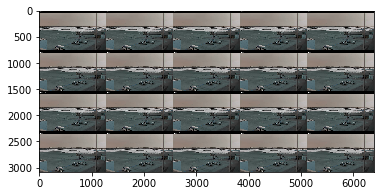

In [6]:
#結合
imgs = get_img_from_videos("video/airport.mp4", 20)
texts = ["test %d" %(i) for i in range(len(imgs))]
total_img = concat_imgs_tile_with_texts(imgs, texts)
plt.imshow(total_img)
cv2.imwrite("img/concat_output.jpg", total_img)

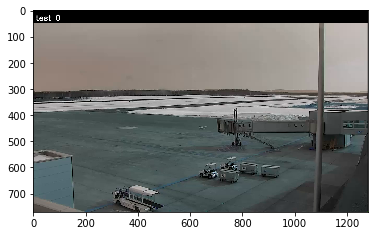

In [7]:
#一つの画像ver
i = 0
img = add_text_to_img(imgs[i], texts[i])
plt.imshow(img)